# functions_lick_rates 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import cv2
from PIL import Image
import plotly.express as px
import imagecodecs
from matplotlib.animation import FuncAnimation
import tkinter as tk
from tkinter import filedialog
import os

In [3]:
def licked_txt(file_path, stage):
    if stage == "stage1":
        footer = 3
    elif stage == "stage2":
        footer = 4
        
    total_lines = sum(1 for line in open(file_path)) # Determine the total number of lines in the file

    data_txt = np.genfromtxt(file_path, delimiter='\t', skip_footer=footer)  # Read the text file into a NumPy array, excluding the last 3 rows

    licked = data_txt[:, 4]
    flash_type = data_txt[:, 2]

    return licked, data_txt, flash_type

In [4]:
def load_files_from_folder(folder_path, stage):
    files = os.listdir(folder_path)
    file_data = {}
    for idx, file_name in enumerate(files, start=1):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            print("Loading file:", file_path)
            # Read file data and store it in a dictionary with variable names
            file_data[f'day{idx}'] = licked_txt(file_path, stage)
    return file_data

In [6]:
def select_folder(stage):
    folder_path = filedialog.askdirectory()
    if folder_path:
        print("Selected folder:", folder_path)
        file_data = load_files_from_folder(folder_path, stage)
        print("Processing complete.")
        # Example: Access data for day 1: file_data['day1']
        # Example: Access data for day 2: file_data['day2']
    return file_data

In [75]:
def licking(file_data, stage):
    variable_data = []
    
    for idx, data in file_data.items():
        count_1 = 0
        count_2 = 0
        day_number = int(idx[3:])
        licked_values = data[0]
        flash_type_values = data[2]  
        for value in flash_type_values:
            if value == 1:
                count_1 += 1
            elif value == 2:
                count_2 += 1
    
        if stage == "stage2":
            left_lick = ((sum(licked_values[i] for i in range(len(licked_values)) if flash_type_values[i] == 1))/count_1)*100
            right_lick = ((sum(licked_values[i] for i in range(len(licked_values)) if flash_type_values[i] == 2))/count_2)*100
            variable_data.append([day_number, left_lick, right_lick])
            print(f"Stage 2 day {day_number} reached left lick rate of {left_lick}%, and right lick rate of {right_lick}%")
        elif stage == "stage1": 
            summed_value = sum(data[0])
            variable_data.append([day_number, summed_value])
            print(f"Stage 1 day {day_number} reached a lick rate of {summed_value}%")
    return variable_data

In [76]:
def plot_array(array, stage):
    # Extract x and y values from the array
    x_values = [row[0] for row in array]
    if stage == "stage1":
        y_values = [row[1] for row in array]
    elif stage == "stage2":
        y_values_left = [row[1] for row in array]
        y_values_right = [row[2] for row in array]

    # Plot the data
    plt.figure(figsize=(3, 3))
    if stage == "stage1":
        plt.plot(x_values, y_values, marker='o', linestyle='-', color='g')
        plt.legend(["Lick rate"])
    elif stage == "stage2":
        plt.plot(x_values, y_values_left, marker='o', linestyle='-', color='c', label='Left')
        plt.plot(x_values, y_values_right, marker='o', linestyle='-', color='y', label='Right')
        plt.legend(["Left", "Right"])

    plt.xlabel('Day Number')
    plt.ylabel('Percent licked (%)')
    plt.title('Lick rate per day')
    
    # Set y-axis limit and ticks
    y_max = 110  # Set maximum value to 100 with extra space above
    y_ticks = np.linspace(0, 100, num=11)  # Set ticks from 0 to 100 in intervals of 10
    plt.ylim(0, y_max)  # Set y-axis limit
    plt.yticks(y_ticks)
    
    # Set x-axis ticks
    x_ticks = np.linspace(1, len(x_values), num=len(x_values), dtype=int)  # Set ticks based on the number of data points
    plt.xticks(x_ticks)
    
    plt.tight_layout()
    plt.show()


In [77]:
stage = "stage2"
file_data = select_folder(stage)
lick_rate = licking(file_data, stage)

Selected folder: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage2_443076_m1/lick_rates
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage2_443076_m1/lick_rates\443076_m1_stage2_day1_2024-02-18_13-59-32_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage2_443076_m1/lick_rates\443076_m1_stage2_day2_2024-02-19_12-59-01_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage2_443076_m1/lick_rates\443076_m1_stage2_day3_2024-02-20_13-41-56_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage2_443076_m1/lick_rates\443076_m1_stage2_day4_2024-02-21_11-40-35_data.txt
Processing complete.
Stage 2 day 1 reached left lick rate of 68.33333333333333%, and right lick rate of 97.5%
Stage 2 day 2 reached left lick rate of 87.5%, and right lick rate of 72.72727272727273%
Stage 2 day 3 reached left lick rate of 96.42857142857143%, and right lick rate of 100.0%
Stage 2 day 4 reached left li

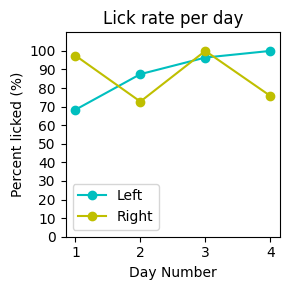

In [78]:
plot_array(lick_rate,stage)